# Lab1 - Deep learning architectures for Image Classification

In this tutorial, we will see some classic architectures of convolutional networks and how to use pre-trained networks to speed-up training on new tasks.

The first two sections are an introduction to Git/GitHub and Pytorch. The last part focuses on Deep learning architecture.

## First part: Introduction to Git and GitHub

This notebook will guide you through the essential commands and operations needed to use Git and GitHub effectively. By the end of this notebook, you will be able to:

1. Install and configure Git.
2. Create a local repository.
3. Make commits to your repository.
4. Push your repository to GitHub.
5. Collaborate with others using GitHub.

### Step 1: Install and Configure Git

First, you need to install Git on your computer. You can download it from [git-scm.com](https://git-scm.com/).

Once installed, open your terminal (Command Prompt, PowerShell, or Git Bash) and configure Git with your username and email:


In [4]:
!git config --global user.name "Shashwat SHARMA"
!git config --global user.email "zshashwatz@gmail.com"

### Step 2: Create a Local Repository

1. Create a new directory for your project and navigate into it:

In [6]:
!mkdir my_project
!cd my_project

2. Initialize a new Git repository:

In [7]:
!git init

Reinitialized existing Git repository in /users/eleves-b/2024/shashwat.sharma/compvision/.git/


### Step 3: Make Commits to Your Repository

1. Create a new file (e.g., README.md) and add some content to it

In [9]:
!echo "# My Project" > README.md

2. Check the status of your repository:

In [10]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   README.md
	modified:   lab1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")



3. Add the file to the staging area:

In [11]:
!git add README.md

4. Commit the changes:

In [12]:
!git commit -m "Initial commit"

[main 1feb331] Initial commit
 1 file changed, 1 insertion(+), 1 deletion(-)


### Step 4: Push Your Repository to GitHub

1. Create a new repository on GitHub. Do not initialize the repository with a README, .gitignore, or license.

2. Add the remote repository URL to your local repository:

In [13]:
!git remote add origin https://github.com/shashuat/compvision.git

error: remote origin already exists.


3. Push your changes to the remote repository:

In [21]:
!git push -u origin main 

fatal: invalid refspec '/shashuat'


In [15]:
!git config --global credential.helper cache


### Step 5: Collaborate with Others Using GitHub

To collaborate with others, you can add collaborators to your GitHub repository. Go to the repository settings and add collaborators.

Collaborators can clone the repository to their local machine:

In [ ]:
git clone https://github.com/yourusername/my_project.git

Collaborators can create a new branch to work on a feature (A simple rule is: "one new feature, one branch, one pull request")


In [ ]:
git checkout -b feature-branch

They can make changes and commit them:

In [ ]:
git add .
git commit -m "Add new feature"

Push the branch to the remote repository:

In [ ]:
git push origin feature-branch

Create a pull request on GitHub to merge the branch into the main branch.

1. Click on "Contribute" and "Open pull request".

2. Select the Base (the branch you want to merge your changes into, typically the `main` or `master` branch.) and Compare (the branch that contains your changes) ranches:

3. Review the Changes: GitHub will show you the changes between the two branches. Review these changes to ensure everything looks correct.

4. Fill out the pull request form and create the pull request:

5. Review and Merge:

The pull request will now be visible to collaborators, who can review your changes, leave comments, and request modifications. If reviewers request changes, make the necessary modifications in your branch, commit them, and push the updates to the same branch. The pull request will automatically update with the new changes. Once the pull request is approved, you or a collaborator with merge permissions can merge the pull request into the base branch.



### Additional Git Commands

- Check the status of your repository:

In [ ]:
git status

- View the commit history:

In [ ]:
git log

- Switch to a different branch:

In [ ]:
git checkout branch-name

Merge a branch into the current branch:

In [ ]:
git merge branch-name

- Fetch updates from the remote repository:

In [ ]:
git fetch

- Pull updates from the remote repository and merge them into the current branch:

In [ ]:
git pull

## Second part: Introduction to PyTorch

PyTorch is an open-source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily as a research platform that provides dynamic computation graphs and rich ecosystems of tools and libraries.

In this section, we will:
1. Introduce PyTorch and its basic concepts.
2. Learn how to manipulate tensors.
3. Define a simple Multi-Layer Perceptron (MLP).
4. Train the MLP on a simple dataset.

First, let's download and import PyTorch and check its version.

In [1]:
!pip install torch torchvision torchaudio numpy

In [2]:
import torch
print(f"PyTorch version: {torch.__version__}")

PyTorch version: 2.5.1


### 1. Tensors

Tensors are the core data structure in PyTorch. They are similar to NumPy arrays but with added functionality for GPU acceleration and automatic differentiation. Tensors are optimized for automatic differentiation (we will see more about that later in the Gradient section).

A. Creating Tensors

Tensor can be created
- directly from data. The data type is automatically inferred.
- from NumPy arrays
- from another tensor
- with random or constant values

In [3]:
# Creating a tensor from a list
x_from_list = torch.tensor([1, 2, 3, 4, 5])
print(f"Tensor from list: \n {x_from_list}")

# Creating a tensor from a numpy array
import numpy as np
numpy_array = np.array([1, 2, 3, 4, 5])
x_from_numpy = torch.tensor(numpy_array)


# Creating a tensor from another tensor
x_ones = torch.ones_like(x_from_list)
print(f"Ones Tensor: \n {x_from_list} \n")

x_rand = torch.rand_like(x_from_list, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")


# Creating a tensor with random values
x_random = torch.rand((3, 3))
print(f"Tensor with random values: \n {x_random} \n")


# Creating a tensor with constant values
x_zeros = torch.zeros((3, 3))
print(f"Tensor with zeros:\n {x_zeros} \n")

x_ones = torch.ones((3, 3))
print(f"Tensor with ones: \n {x_ones} \n")

Tensor from list: 
 tensor([1, 2, 3, 4, 5])
Ones Tensor: 
 tensor([1, 2, 3, 4, 5]) 

Random Tensor: 
 tensor([0.3217, 0.3294, 0.0901, 0.8379, 0.1339]) 

Tensor with random values: 
 tensor([[0.3209, 0.3764, 0.9156],
        [0.3196, 0.3770, 0.5717],
        [0.5844, 0.4693, 0.1060]]) 

Tensor with zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 

Tensor with ones: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 



Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [4]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


We notice that the variable `tensor` has 'cpu' as device attribute. PyTorch allows you to store tensors and perform computations on different devices, such as the CPU and GPU. Using a GPU can significantly speed up training and inference for large models and datasets.

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using .to method. First, let's check if a GPU is available.

In [7]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() 
                      else "mps" if torch.mps.is_available()
                      else "cpu")
print(f"Using device: {device}")

Using device: mps


If you’re using Colab, you can allocate a GPU by going to Runtime > Change runtime type > GPU.
You can move tensors to a specific device using the .to(device) method.

In [9]:
# Create a tensor (by default on the cpu)
tensor_cpu = torch.tensor([1.0, 2.0, 3.0])
print(f"Tensor on device: {tensor_cpu.device}")

# Move the tensor to the selected device
if torch.cuda.is_available():
    device = torch.device("cuda")
    tensor_device = tensor_cpu.to(device)
    print(f"Tensor on device: {tensor_device.device}")

# Move the tensor to the selected device (mps)
if torch.mps.is_available():
    device = torch.device("mps")
    tensor_device = tensor_cpu.to(device)
    print(f"Tensor on device: {tensor_device.device}")

Tensor on device: cpu
Tensor on device: mps:0


### 2. Tensor operations

Lots of tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are already implemented in PyTorch. The next cells show some basic operations. You can find comprehensively list of available operations [here](https://pytorch.org/docs/stable/torch.html).

Arithmetic operation

In [10]:
# Adding two tensors
tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([4, 5, 6])
tensor_sum = tensor_a + tensor_b
print(f"Sum of tensors: \n {tensor_sum}\n")


# Multiplying two tensors element-wise. All three result tensors will have the same value
tensor_product_1 = tensor_a * tensor_b
tensor_product_2 = tensor_a.mul(tensor_b)
tensor_product_3 = torch.mul(tensor_a, tensor_b)
print(f"Product of tensors: \n {tensor_product_1} \n")

y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# Matrix multiplication. All three result tensors will have the same value
tensor_c = torch.tensor([[1, 2], [3, 4]])
tensor_d = torch.tensor([[5, 6], [7, 8]])
tensor_matmul_1 = tensor_c.matmul(tensor_d)
tensor_matmul_2 = tensor_c @ tensor_d
tensor_matmul_3 = torch.matmul(tensor_c, tensor_d)
print(f"Matrix multiplication: \n {tensor_matmul_1} \n")

Sum of tensors: 
 tensor([5, 7, 9])

Product of tensors: 
 tensor([ 4, 10, 18]) 

Matrix multiplication: 
 tensor([[19, 22],
        [43, 50]]) 



Indexing and Slicing

In [12]:
# Creating a 2D tensor
tensor_2d = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f"2D Tensor: \n {tensor_2d} \n")

# Indexing
print(f"Element at (0, 0): \n {tensor_2d[0, 0]} \n")

# Slicing
print(f"First row: \n {tensor_2d[0, :]} \n")
print(f"First column: \n {tensor_2d[:, 0]} \n")

2D Tensor: 
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]) 

Element at (0, 0): 
 1 

First row: 
 tensor([1, 2, 3]) 

First column: 
 tensor([1, 4, 7]) 



Single tensor operations

In [13]:
tensor = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])

## Statistical operations:
mean_value = tensor.mean()
print(f"Mean of tensor: \n {mean_value} - {type(mean_value)} \n")
mean_value_item = mean_value.item()
print(f"Mean of tensor (item): \n {mean_value_item} - {type(mean_value_item)}\n")

# Sum of all elements
sum_value = tensor.sum()
print(f"Sum of tensor: \n {sum_value} \n")

# Maximum value
max_value = tensor.max()
print(f"Maximum value in tensor: \n {max_value} \n")

# Minimum value
min_value = tensor.min()
print(f"Minimum value in tensor: \n {min_value} \n")

# Standard deviation
std_value = tensor.std()
print(f"Standard deviation of tensor: \n {std_value} \n")


Mean of tensor: 
 3.0 - <class 'torch.Tensor'> 

Mean of tensor (item): 
 3.0 - <class 'float'>

Sum of tensor: 
 15.0 

Maximum value in tensor: 
 5.0 

Minimum value in tensor: 
 1.0 

Standard deviation of tensor: 
 1.5811388492584229 



Concatenation and operation on the dimension

In [15]:
tensor = torch.ones(4, 4)
print(f"Initial tensor: \n {tensor} \n")

# Concatenation of tensors
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(f"Concatenated tensor (dim=1): \n {t1} \n")

t2 = torch.cat([tensor, tensor, tensor], dim=0)
print(f"Concatenated tensor (dim=0): \n {t2} \n")

# Squeeze and Unsqueeze operations
tensor_with_ones = torch.tensor([[1.0], [2.0], [3.0]])
print(f"Tensor with ones shape: \n {tensor_with_ones.shape} \n")
squeezed_tensor = tensor_with_ones.squeeze()
print(f"Squeezed tensor shape: \n {squeezed_tensor.shape} \n")

unsqueezed_tensor = tensor.unsqueeze(0)
print(f"Unsqueezed tensor shape at dimension 0 (shape): \n {unsqueezed_tensor.shape} \n")

# Add a dimension of size 1 at position 1
unsqueezed_tensor_1 = tensor.unsqueeze(1)
print(f"Unsqueezed tensor at dimension 1 (shape): \n {unsqueezed_tensor_1.shape} \n")

Initial tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Concatenated tensor (dim=1): 
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]) 

Concatenated tensor (dim=0): 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Tensor with ones shape: 
 torch.Size([3, 1]) 

Squeezed tensor shape: 
 torch.Size([3]) 

Unsqueezed tensor shape at dimension 0 (shape): 
 torch.Size([1, 4, 4]) 

Unsqueezed tensor at dimension 1 (shape): 
 torch.Size([4, 1, 4]) 



### 2. Neural networks

Neural networks comprise of layers/modules that perform operations on data. Neural networks in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers).

To create a neural network in PyTorch, follow these steps:
1. Define a class that inherits from `nn.Module`.
2. Implement the `__init__` method to initialize the layers of the network.
3. Implement the `forward` method to define the forward pass of the network.


The `__init__` function is used to initialize the layers of the neural network. In this example, we will define an MLP with one hidden layer.

The `forward` takes the input data x and passes it through the first fully connected layer (fc1). This layer applies a linear transformation to the input data. The first layer is then passed through the ReLU activation function. he output of the ReLU activation is finally passed through the second fully connected layer (fc2).  

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_size, output_size)  # Second fully connected layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first layer
        x = self.fc2(x)  # Apply the second layer
        return x

Our MLP class is now defined. We can create an instance this class and move it to the `device`:

In [17]:
# Define the MLP
input_size = 784
hidden_size = 256
output_size = 10
model = SimpleMLP(input_size, hidden_size, output_size)
model.to(device)

# Print the model architecture
print(model)

SimpleMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


To use the model, we pass it the input data. This executes the model’s forward, along with some background operations. Do not call `model.forward()` directly!

In [18]:
X = torch.rand(1, 784, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.item()}")

Predicted class: 2


Let’s break down the layers in the model.
We consider an input tensor `x` of shape `[1, 784]` (1 for the batch size, 784 for the size).

- nn.Linear

The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.


In [19]:
x = torch.rand(1, 784, device=device)

layer1 = nn.Linear(in_features=784, out_features=20, device=device)
hidden1 = layer1(x)
print(hidden1.size())

torch.Size([1, 20])


- nn.ReLU

Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use nn.ReLU between our linear layers.

In [20]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.4330,  0.0730, -0.2075, -0.2851,  0.0648,  0.6901, -0.2573, -0.5050,
          0.2497,  0.5910, -0.1916,  0.3942, -0.1714, -0.1149, -0.0965, -0.6792,
         -0.1645, -0.0834,  0.0560,  0.4117]], device='mps:0',
       grad_fn=<LinearBackward0>)


After ReLU: tensor([[0.0000, 0.0730, 0.0000, 0.0000, 0.0648, 0.6901, 0.0000, 0.0000, 0.2497,
         0.5910, 0.0000, 0.3942, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0560, 0.4117]], device='mps:0', grad_fn=<ReluBackward0>)


- nn.Sequential

nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

In [21]:
seq_modules = nn.Sequential(
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10, device=device)
)
logits = seq_modules(x)

- nn.Softmax

The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [22]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(f"Predicted probabilities: \n {pred_probab} \n")

Predicted probabilities: 
 tensor([[0.0838, 0.0846, 0.1076, 0.0948, 0.1157, 0.1155, 0.0938, 0.1094, 0.0956,
         0.0992]], device='mps:0', grad_fn=<SoftmaxBackward0>) 



Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. You can access to the parameters of a model using: `parameters()` or `named_parameters()` methods.

In [23]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} \n")

Model structure: SimpleMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


Layer: fc1.weight | Size: torch.Size([256, 784]) 

Layer: fc1.bias | Size: torch.Size([256]) 

Layer: fc2.weight | Size: torch.Size([10, 256]) 

Layer: fc2.bias | Size: torch.Size([10]) 



### 3. Differentiation and gradients in PyTorch

When training neural networks, the most frequently used algorithm is back propagation. In this algorithm, parameters (model weights) are adjusted according to the gradient of the loss function with respect to the given parameter.

To compute those gradients, PyTorch has a built-in differentiation engine called torch.autograd. It supports automatic computation of gradient for any computational graph.

To compute the derivative (of a variable, a loss, etc. with respect to a parameters), we use the `.backward()` method:  

In [24]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

y = x ** 2
z = y.sum()

# Compute the gradient
z.backward()

print("Gradient of z with respect to x:", x.grad)

Gradient of z with respect to x: tensor([2., 4., 6.])


Consider the simplest one-layer neural network `z = w x + b`, with input x, parameters w and b, and some loss function.

In this network, w and b are parameters, which we need to optimize. Thus, we need to be able to compute the gradients of loss function with respect to those variables.

In [25]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

loss.backward()
print(f"Gradient of the loss with respect to w: \n {w.grad} \n")
print(f"Gradient of the loss with respect to b: \n {b.grad} \n")

Gradient of the loss with respect to w: 
 tensor([[0.0676, 0.0063, 0.3253],
        [0.0676, 0.0063, 0.3253],
        [0.0676, 0.0063, 0.3253],
        [0.0676, 0.0063, 0.3253],
        [0.0676, 0.0063, 0.3253]]) 

Gradient of the loss with respect to b: 
 tensor([0.0676, 0.0063, 0.3253]) 



A function that we apply to tensors to construct computational graph is in fact an object of class Function. This object knows how to compute the function in the forward direction, and also how to compute its derivative during the backward propagation step. A reference to the backward propagation function is stored in grad_fn property of a tensor.

In [26]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x1244223b0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x124422590>


### 4. Training a neural network

Training a neural network in PyTorch involves several key steps: defining the model, preparing the data, specifying the loss function and optimizer, and iterating through the training loop. Let's go through each step in detail.

1. Define the model

We will use the Multi-Layer Perceptron defined in the previous section.

2. Prepare the data

Next, we need to prepare our training and evaluation data. PyTorch provides `Dataset` and `DataLoader` classes to handle data loading and preprocessing efficiently. The `Dataset` class is an abstract class representing a dataset, and the `DataLoader` class provides an iterable over the given dataset. The `torchvision.datasets` module contains Dataset objects for many real-world vision data like CIFAR or COCO.

In this example, we will use the [MNIST](https://yann.lecun.com/exdb/mnist/) dataset.




PyTorch provides `Dataset` and `DataLoader` classes to handle data loading and preprocessing efficiently. The `Dataset` class is an abstract class representing a dataset, and the `DataLoader` class provides an iterable over the given dataset.

In this section, we will work with the MNIST Dataset. The `torchvision.datasets` module contains Dataset objects for many real-world vision data like CIFAR or COCO.

In [27]:
from torchvision import datasets
import torchvision.transforms as T

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=T.Compose([T.ToTensor(), T.Lambda(lambda x: torch.flatten(x))]),
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=T.Compose([T.ToTensor(), T.Lambda(lambda x: torch.flatten(x))]),
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.76MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 102kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.12MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.34MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



We then pass the Dataset as an argument to DataLoader. The DataLoader class supports batching, shuffling, and loading data in parallel using multiprocessing workers. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [28]:
from torch.utils.data import DataLoader

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 784])
Shape of y: torch.Size([64]) torch.int64


3. Specify the Loss Function and Optimizer

The loss function measures the difference between the predicted outputs and the true labels. The optimizer updates the model parameters to minimize the loss.

In [29]:
import torch.optim as optim

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

4. Training Loop

The training loop involves iterating over the dataset, performing forward and backward passes, and updating the model parameters. The main steps are:
- Zero the Parameter Gradients: `optimizer.zero_grad()` clears the old gradients from the last step. This is important because PyTorch accumulates gradients by default.
- Forward Pass: The input data is passed through the model to get the outputs. The loss is then computed using the criterion.
- Backward Pass: `loss.backward()` computes the gradient of the loss with respect to the model parameters.
- Optimization: `optimizer.step()` updates the model parameters using the computed gradients.

In [37]:
# Training loop
model.to('mps')

num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_dataloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0

print("Training complete.")


Epoch [1/10], Step [100/938], Loss: 0.0212
Epoch [1/10], Step [200/938], Loss: 0.0205
Epoch [1/10], Step [300/938], Loss: 0.0181
Epoch [1/10], Step [400/938], Loss: 0.0204
Epoch [1/10], Step [500/938], Loss: 0.0238
Epoch [1/10], Step [600/938], Loss: 0.0233
Epoch [1/10], Step [700/938], Loss: 0.0213
Epoch [1/10], Step [800/938], Loss: 0.0231
Epoch [1/10], Step [900/938], Loss: 0.0179
Epoch [2/10], Step [100/938], Loss: 0.0198
Epoch [2/10], Step [200/938], Loss: 0.0188
Epoch [2/10], Step [300/938], Loss: 0.0166
Epoch [2/10], Step [400/938], Loss: 0.0189
Epoch [2/10], Step [500/938], Loss: 0.0219
Epoch [2/10], Step [600/938], Loss: 0.0217
Epoch [2/10], Step [700/938], Loss: 0.0197
Epoch [2/10], Step [800/938], Loss: 0.0214
Epoch [2/10], Step [900/938], Loss: 0.0166
Epoch [3/10], Step [100/938], Loss: 0.0184
Epoch [3/10], Step [200/938], Loss: 0.0174
Epoch [3/10], Step [300/938], Loss: 0.0153
Epoch [3/10], Step [400/938], Loss: 0.0175
Epoch [3/10], Step [500/938], Loss: 0.0203
Epoch [3/10

5. Evaluation

After training, you can evaluate the model on the test dataset to see how well it performs. We need to:
- Set the Model to Evaluation Mode: `model.eval()` sets the model to evaluation model
- Disable Gradient Calculation: `torch.no_grad()` disables gradient calculation. It also reduce memory consumption and speeds up computation.
- Compute Accuracy: The model's predictions are compared to the true labels to compute the accuracy.


In [38]:
# Evaluation loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 98.17%


## Third part: CNN, ResNet, and deep learning architecture for Image Classification

In this part, we will see some classic architectures of convolutional networks and how to use pre-trained networks to speed-up training on new tasks.

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from matplotlib import pyplot as plt
from functools import partial
from tqdm import tqdm
import math
import numpy as np
import matplotlib.ticker as ticker


device = torch.device("cuda:0" if torch.cuda.is_available() 
                      else "mps:0" if torch.mps.is_available()
                      else "cpu")
device

device(type='mps', index=0)

# Importance of weight initialization

The initialization of the weights of a Neural Network are a key aspect of the training of Neural Networks.



## Question 1
Using the FashionMNIST dataset, train a feed forward neural network with 2 hidden layers, with sizes 64 and 32. Use a cross-entropy loss.

Make sure to enable the initialization of the weights and biases with different methods. You will study the constante, kaiming, uniform, normal and xavier initializations (see `torch.nn.init`)

In [46]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.286, 0.353),
    transforms.Lambda(lambda x: x.view(-1))
])

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

class FFN(nn.Module):
    def __init__(self, input_size, output_size, init=nn.init.xavier_normal_):
        super(FFN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
input_size = 28*28
output_size = 10
model = FFN(input_size, output_size).to(device)

print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

FFN(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)



## Question 2
Plot the different training losses and compare the different initializations

Epoch 1/1, Loss: 0.2755
Epoch 1/1, Loss: 0.2740
Epoch 1/1, Loss: 0.1430
Epoch 1/1, Loss: 0.4716
Epoch 1/1, Loss: 0.5591


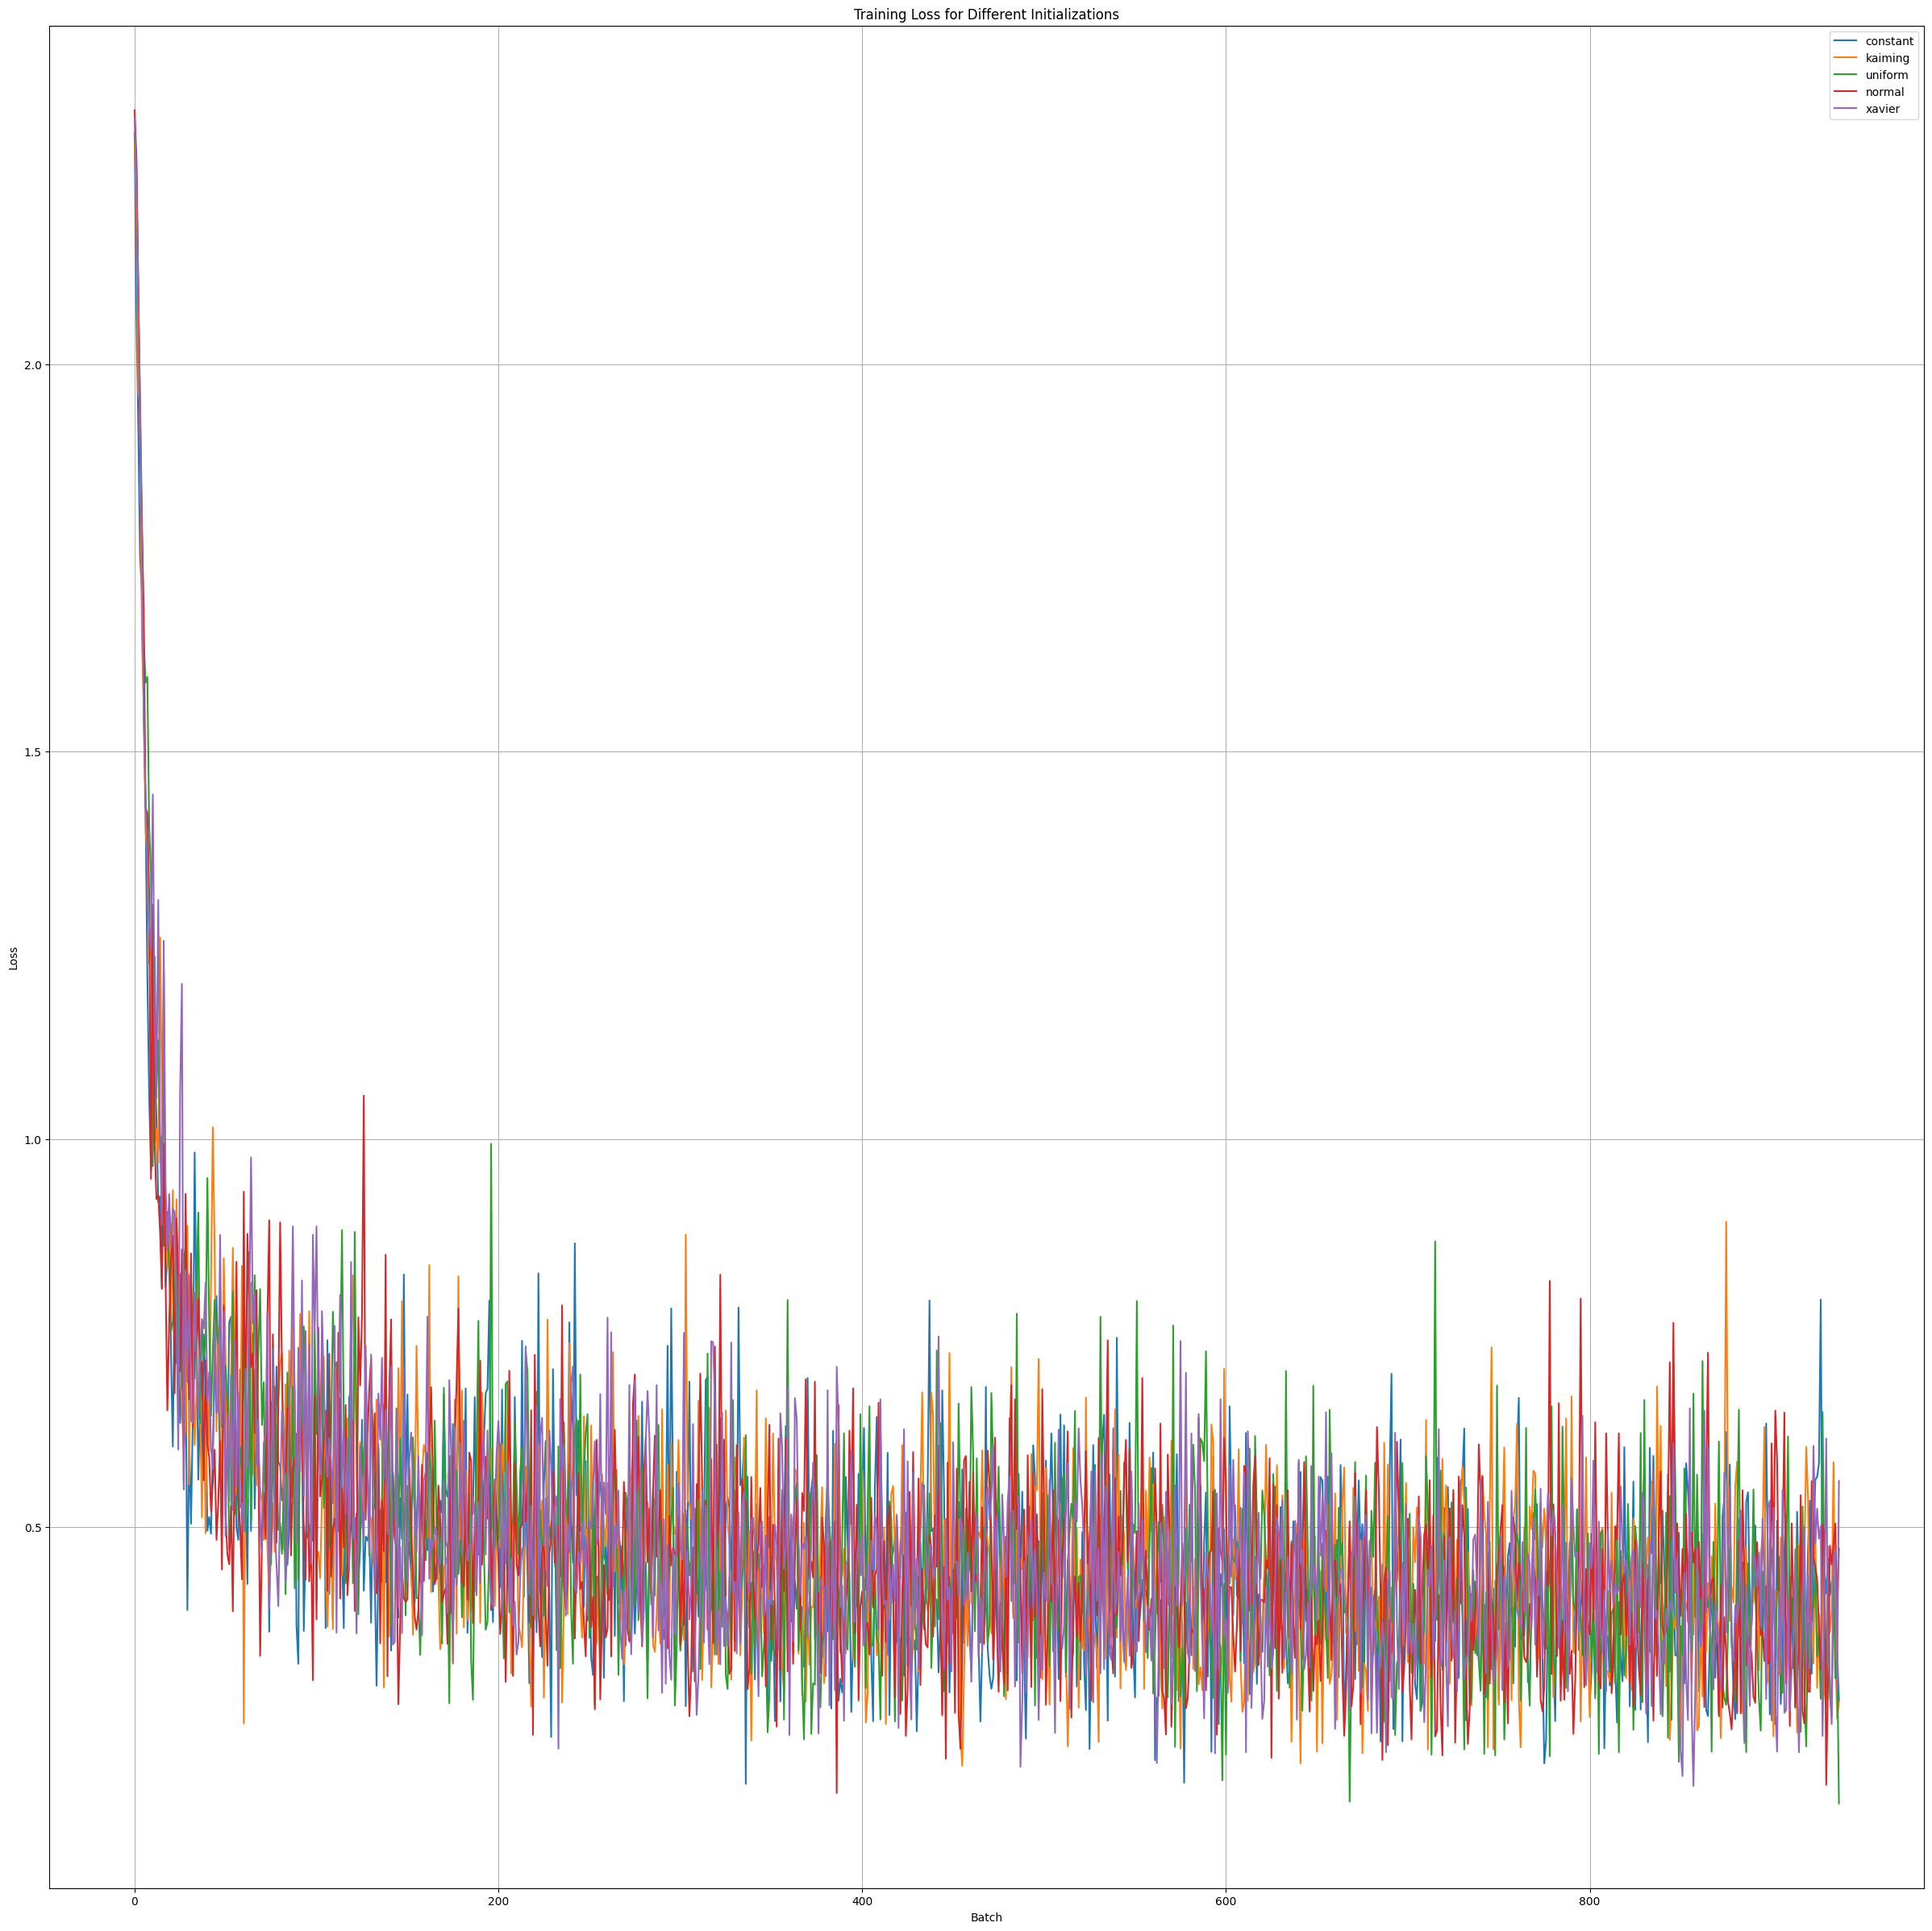

In [64]:

def train(model, train_loader, optimizer, criterion, device, epochs=10):
    model.train()
    train_losses = []
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            train_losses.append(loss.detach().item())
            loss.backward()
            optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
    return train_losses

def train_and_plot_all_inits(train_loader, criterion, device, inits, epochs=1, lr=3e-3):
    plt.figure(figsize=(30, 30))  # Create a single figure
    for name, init in inits.items():
        model = FFN(input_size, output_size, init=init).to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        train_losses = train(model, train_loader, optimizer, criterion, device, epochs)
        plt.plot(train_losses, label=name)  # Plot each loss curve with a label
    plt.title("Training Loss for Different Initializations")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()  # Add a legend to identify each initialization
    plt.grid(True)  # Add a grid for better visualization
    plt.show()

    


criterion = nn.CrossEntropyLoss()
# constante, kaiming, uniform, normal and xavier initializations (see `torch.nn.init`)
inits = {
    'constant': partial(nn.init.constant_, val=0.5),
    'kaiming': nn.init.kaiming_normal_,
    'uniform': nn.init.uniform_,
    'normal': nn.init.normal_,
    'xavier': nn.init.xavier_normal_
}

train_and_plot_all_inits(train_loader, criterion, device, inits)

# Regularization

When training a Neural Network, we want to avoid at all cost overfitting. Overfitting occurs when when have overlearned on our training set. The first thing to do is to compare the performances (loss or metrics) of the train dataset with the validation dataset. If you see a gap in performances, this means that you have overfitted your network.

To study the impact of overfitting, we will leverage a synthetic dataset given by the following Dataset.

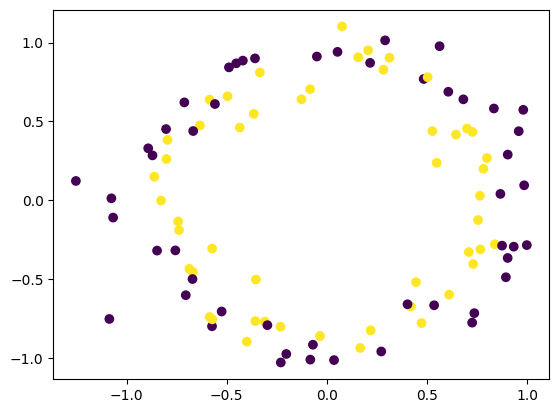

In [65]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

class CircleDataset(nn.Module):
    def __init__(self, num_samples, std=0.1, transform=None, seed=None):
        self.x, self.y = make_circles(n_samples=num_samples, noise=std, random_state=seed)
        self.x = torch.from_numpy(self.x).float()
        self.y = torch.from_numpy(self.y).float()
        self.len = self.x.shape[0]
        self.transform = transform


    def __getitem__(self, index):
        if self.transform:
            return self.transform(self.x[index]), self.y[index]
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

# Plot the dataset
dataset = CircleDataset(100)
plt.scatter(dataset.x[:,0], dataset.x[:,1], c=dataset.y)
plt.show()

### Question 3
Create a CircleDataset validation and test set with 500 samples, std=0.1. To be able to compare between experiments, use seed 3407 for the validation set and 3408 for the test set. This test set must be the same for every experiment we will do.

Note: Validation and test set are crucial to evaluate the performance of an ML algorithm. The goal is to be able to evaluate the generalisation abilities of our method. Indeed, if we overfit on the train set, we will have optimal performances but our method will not work in out of train set data.

The validation set is used for both monitoring the evolution of training and to tune hyperparameters.

The test set must be used ONLY at the end of training/hparameters tuning. Otherwise, you risk overfitting on it.

In [70]:
circle_val_dataset = CircleDataset(500, std=0.1, seed=3407)
circle_test_dataset = CircleDataset(500, std=0.1, seed=3408)

circle_val_loader = torch.utils.data.DataLoader(dataset=circle_val_dataset, batch_size=64, shuffle=False)
circle_test_loader = torch.utils.data.DataLoader(dataset=circle_test_dataset, batch_size=64, shuffle=False)

### Question 4
Create a Feed Forward architecture with 2 hidden layers of size 500, 500. Use the `BCELoss`, and the Adam optimizer with lr=5e-3. Train for 50000 steps ploting the loss and the accuracy for both the train and val set after each epoch end. Also, compute the accuracy at the end of training on the test set. Train on a new Circle dataset having 50 data points. What can you say about the result?

In [71]:


# Define the model
class FeedForward(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 500),
            nn.ReLU(),
            nn.Linear(500, 500),
            nn.ReLU(),
            nn.Linear(500, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.net(x)

def compute_accuracy(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x)
            predicted = (outputs > 0.5).float()
            total += y.size(0)
            correct += (predicted == y.unsqueeze(1)).sum().item()
    return correct / total

def train(train_loader, val_loader, test_loader, device, epochs=1000):
    model = FeedForward().to(device)
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
    
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y.unsqueeze(1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            
        # Compute metrics
        model.eval()
        with torch.no_grad():
            train_loss = epoch_loss / len(train_loader)
            train_acc = compute_accuracy(model, train_loader, device)
            
            val_loss = 0
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                outputs = model(x)
                val_loss += criterion(outputs, y.unsqueeze(1)).item()
            val_loss /= len(val_loader)
            val_acc = compute_accuracy(model, val_loader, device)
            
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
    test_acc = compute_accuracy(model, test_loader, device)
    return train_losses, train_accs, val_losses, val_accs, test_acc

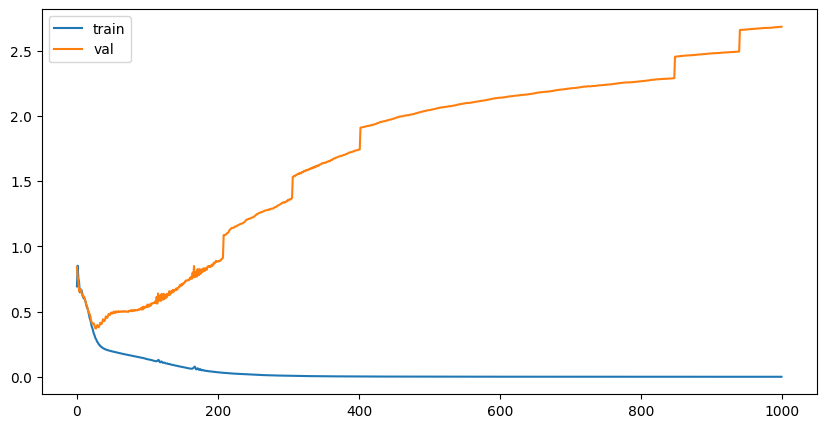

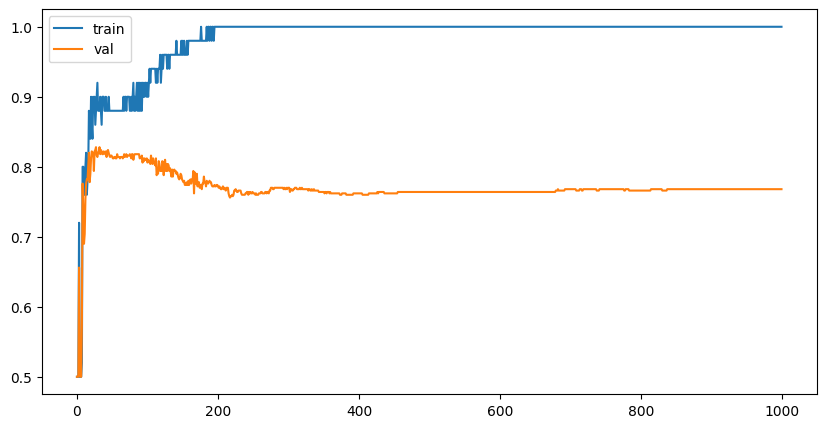

Test accuracy: 0.78


In [72]:

# def train(train_loader, val_loader, test_loader, device, epochs=1000):

#     ### YOUR CODE HERE
#     return train_losses, train_accs, val_losses, val_accs, test_acc

train_circle_dataset = CircleDataset(50, std=0.1, seed=None)
train_circle_loader = torch.utils.data.DataLoader(dataset=train_circle_dataset, batch_size=64, shuffle=True)

train_losses, train_accs, val_losses, val_accs, test_acc = train(train_circle_loader, circle_val_loader, circle_test_loader, device, epochs=1000)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label="train")
plt.plot(val_accs, label="val")
plt.legend()
plt.show()

print(f"Test accuracy: {test_acc:.2f}")

## Influence of the amount of data
The most important regularization technique is more data.
### Question 5
Create multiple train sets having [10, 100, 1000, 10000] datapoints and train the network on this train sets. Plot for each run the training and val losses and accuracy and the test accuracy. How does the overfitting evolves?

In [76]:
train_set_size = [10, 100, 1000, 10000]
train_losses = {}
val_losses = {}
train_accs = {}
val_accs = {}
test_accs = {}
### YOUR CODE HERE

for size in train_set_size:
    train_circle_dataset = CircleDataset(size, std=0.1, seed=None)
    train_circle_loader = torch.utils.data.DataLoader(dataset=train_circle_dataset, batch_size=64, shuffle=True)
    train_losses[size], train_accs[size], val_losses[size], val_accs[size], test_accs[size] = train(train_circle_loader, circle_val_loader, circle_test_loader, device, epochs=100)

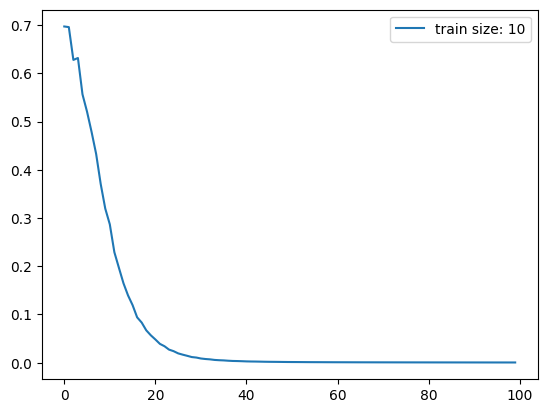

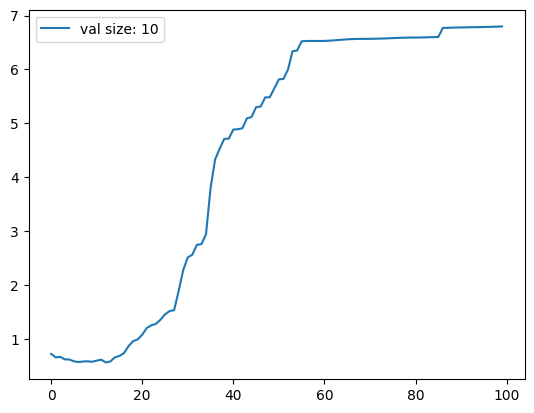

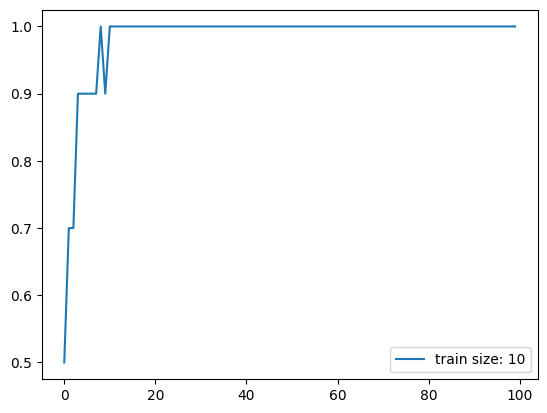

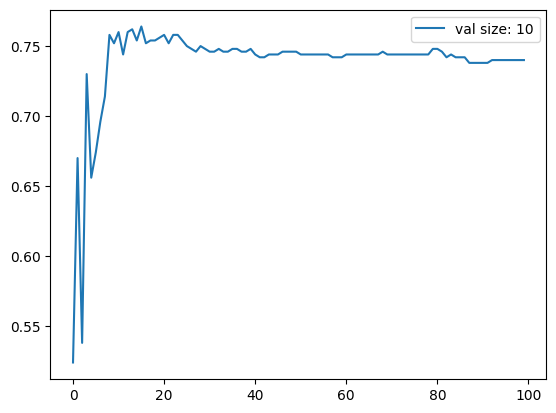

Test accuracy for train size 10: 0.76


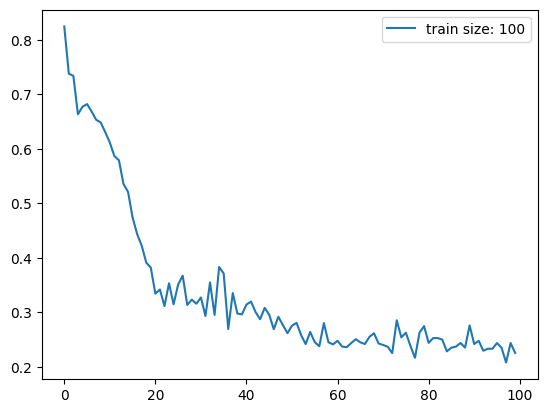

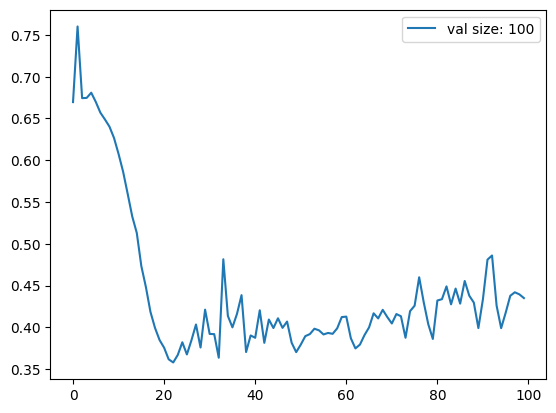

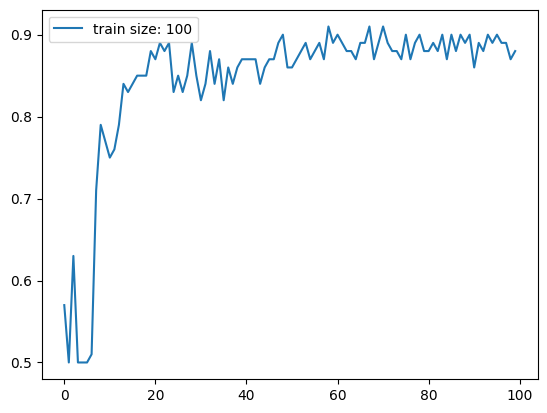

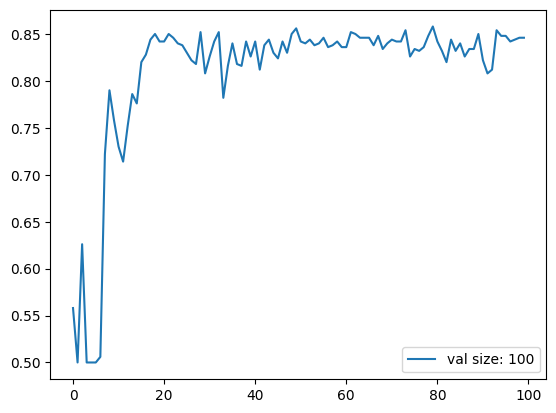

Test accuracy for train size 100: 0.81


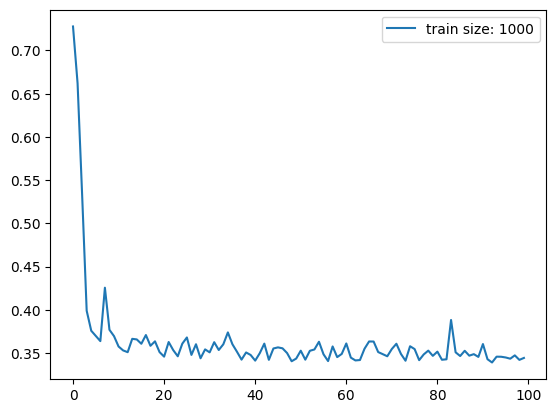

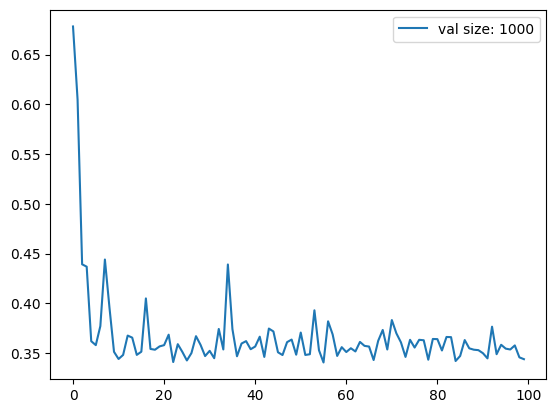

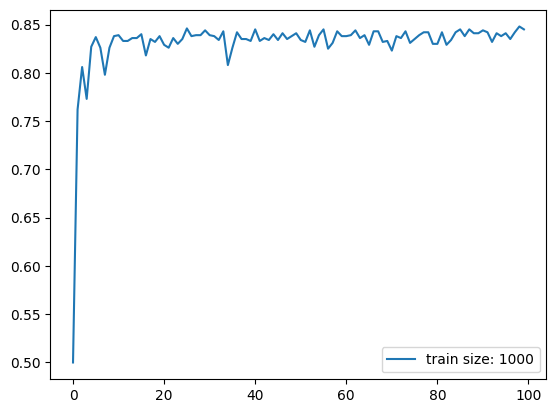

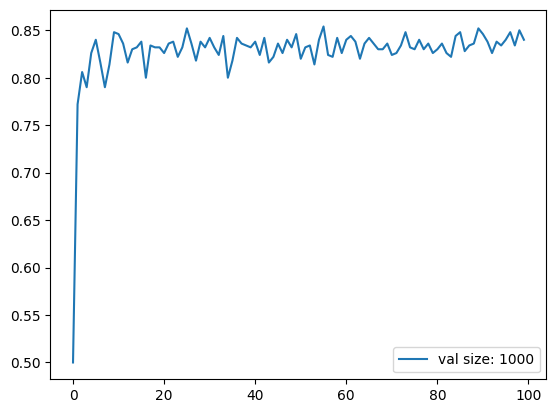

Test accuracy for train size 1000: 0.85


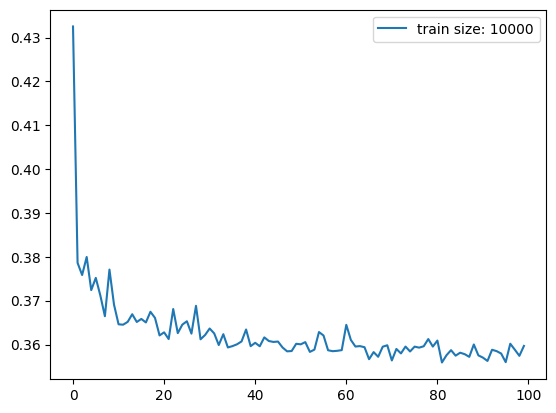

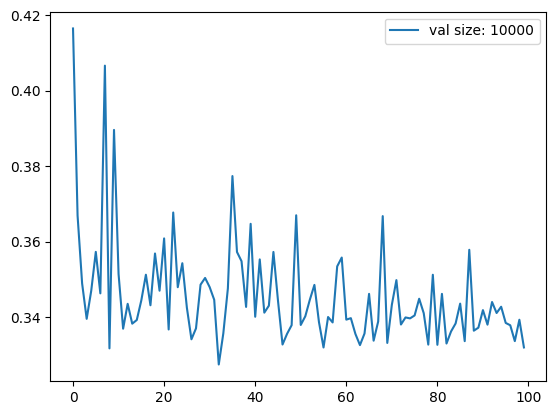

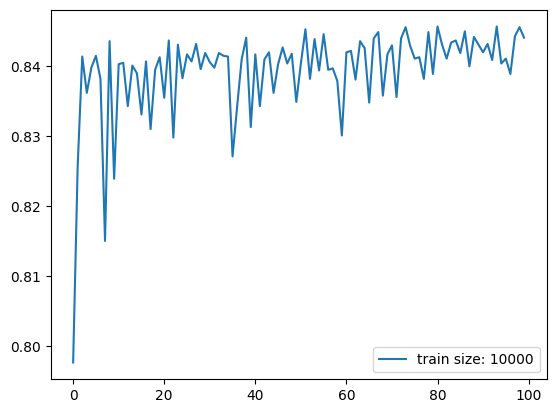

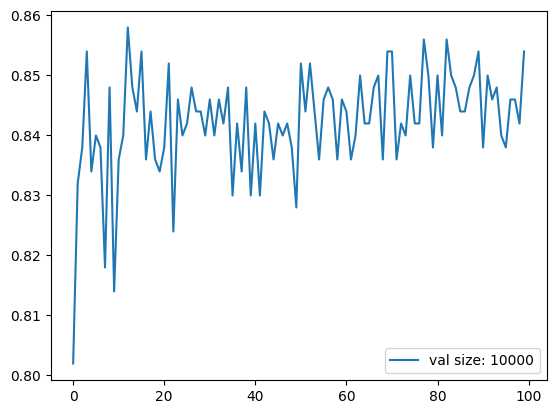

Test accuracy for train size 10000: 0.83


In [77]:
for size in train_set_size:
    plt.plot(train_losses[size], label=f"train size: {size}")
    plt.legend()
    plt.show()
    plt.plot(val_losses[size], label=f"val size: {size}")
    plt.legend()
    plt.show()
    plt.plot(train_accs[size], label=f"train size: {size}")
    plt.legend()
    plt.show()
    plt.plot(val_accs[size], label=f"val size: {size}")
    plt.legend()
    plt.show()
    print(f"Test accuracy for train size {size}: {test_accs[size]:.2f}")


## Data augmentation

In real life, we often have to deal with a small dataset. In this case, we can use data augmentation to artificially increase the size of the dataset. For images multiple data augmentations techniques exist such as:
- Cropping
- Color Jittering
- Geometric transformations
- A lot other techniques (see `torchvision.Transforms` or `Albumentation`)

### Question 6
The main idea here is to "create" new data from existing datapoints.
Create a lambda transform that jitters the datapoints with Gaussian noise.
Use a dataset with 50 samples and train a classifier that leverage the augmentation with stds = [0, 1e-2, 1e-1, 2e-1, 1]. Make sure to have the same train dataset for each exp.
Discuss the results

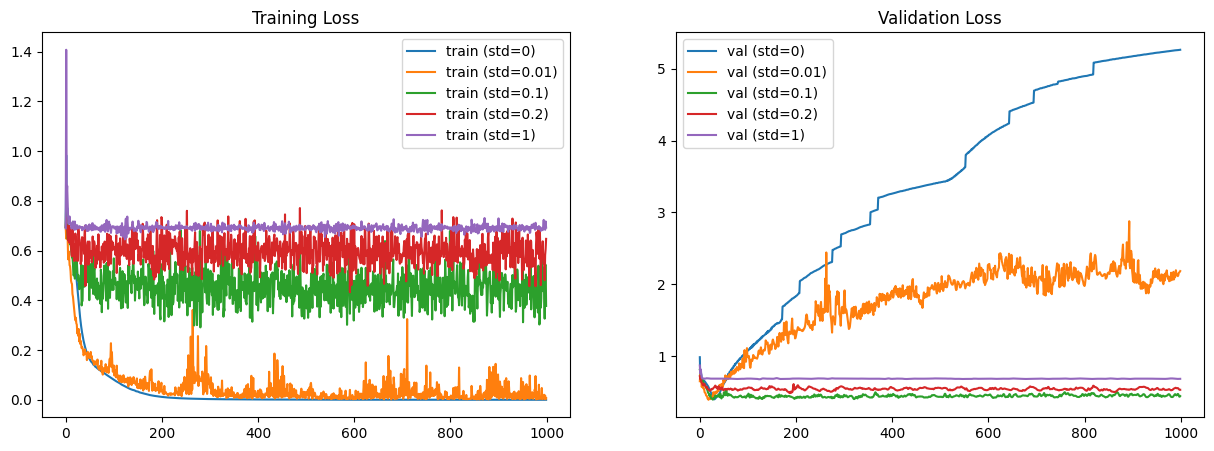

Test accuracy (std=0): 0.7920
Test accuracy (std=0.01): 0.7820
Test accuracy (std=0.1): 0.8040
Test accuracy (std=0.2): 0.7640
Test accuracy (std=1): 0.5140


In [80]:
class RandomNoiseTransform:
    def __init__(self, std=0.001):
        self.std = std
        
    def __call__(self, x):
        return x + torch.randn_like(x) * self.std

base_train_dataset = CircleDataset(50, std=0.1, seed=42)
noise_levels = [0, 1e-2, 1e-1, 2e-1, 1]
num_noise_levels = len(noise_levels)
train_losses = {}
val_losses = {}
train_accs = {}
val_accs = {}
test_accs = {}
# Training loop for each noise level
for std in noise_levels:
    transform = RandomNoiseTransform(std=std) if std > 0 else None
    train_dataset = CircleDataset(50, std=0.1, seed=42, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
    
    # Train model
    train_loss, train_acc, val_loss, val_acc, test_acc = train(
        train_loader, circle_val_loader, circle_test_loader, device, epochs=1000
    )
    
    # Store results
    train_losses[std] = train_loss
    val_losses[std] = val_loss
    train_accs[std] = train_acc
    val_accs[std] = val_acc
    test_accs[std] = test_acc



# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for std in noise_levels:
    plt.plot(train_losses[std], label=f'train (std={std})')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
for std in noise_levels:
    plt.plot(val_losses[std], label=f'val (std={std})')
plt.title('Validation Loss')
plt.legend()

plt.show()

# Print test accuracies
for std in noise_levels:
    print(f"Test accuracy (std={std}): {test_accs[std]:.4f}")

In [ ]:
class RandomNoiseTransform(object):
    def __init__(self, std=0.001):
        self.std = std
        
        ### YOUR CODE HERE

noise_levels = [0, 1e-2, 1e-1, 2e-1, 1]
num_noise_levels = len(noise_levels)
train_losses = {}
val_losses = {}
train_accs = {}
val_accs = {}
test_accs = {}

### YOUR CODE HERE

### Question 7
Visualize the augmented training set for the noise level that gave the best test accuracy. Plot the original points in one color and the augmented one in another. To be able to visualize well what's happening, display 100 iterations on the augmented dataset. What conclusion can you draw from this observation. Could you think of a "smarter" way to augment the data if you can make assumption on the structure of the data manifold?

In [ ]:
### YOUR CODE HERE

### Question 8
Another way to regularize the training is to use dropout. Implement the dropout operation as an nn.Module. Remember, dropout is only implemented when training. Fortunally, `torch.nn.Module` has a flag `training` which is true if the model is training.

In [ ]:
class Dropout(nn.Module):
   ### YOUR CODE HERE

### Question 9
Use dropout to train a model on the circle dataset with 100 samples. Use the same architecture as in Question 8. train with different values of dropout and plot the training and validation loss and accuracy. Compute the test accuracy. What can you conclude?

In [ ]:
def train_dropout(dropout_rate, train_loader, val_loader, test_loader, device, epochs=1000):
    ### YOUR CODE HERE

In [ ]:
dropout_rates = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

train_losses = {}
val_losses = {}
train_accs = {}
val_accs = {}
test_accs = {}
### YOUR CODE HERE


# ImageNet

The [ImageNet](http://www.image-net.org/) dataset is one of the main datasets used in image recognition. It contains more than 14 million images annotated according to the hierarchical structure of the [WordNet](https://wordnet.princeton.edu/) dataset.
Images are organized into classes and subclasses having semantic relationships, for example 'car' and 'plane' are 'vehicles', 'cat' and 'bird' are 'animals', 'plane' and 'bird' are 'flying objects', etc ...

ImageNet was accompanied by the challenge: 'Large Scale Visual Recognition Challenge' (ILSVRC), each edition offers different challenges (classification, detection, segmentation, ...) based on a subset of the dataset.

The advantage of having large datasets for learning is to be able to train networks on fairly general tasks, and after reuse the  learned weights for other applications. This operation is called transfer learning. A deep neural network (DNN) learns more and more abstract (hence high-level) features as one progresses through the layers.

Thus, a neural network (NN) pre-trained on a large dataset has low-level characteristics (learned in the first layers) potentially transferable to many tasks. These include texture, color, etc.  An immediate advantage is saving time as one does not have to re-train the NN for every new task from scratch. Another advantage is the fact that the models obtained are more robust. Indeed, a network pre-trained on a complete, large-scale dataset needs on the one hand fewer examples (since it has already seen a lot of them during the first training), and has less risk of over-learning the low level characteristics.

# AlexNet

In 2012, the [AlexNet](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) architecture won the ImageNet competition. The name comes from the first author Alex Krizhevsky. It is a CNN that classifies images into 1000 categories by producing a probability distribution over 1000 classes for each image. The metric used is the percentage of error among the *k* most probable classes (*top-k* error), i.e., we look to see if the true/correct prediction is among the *k* most probable classes predicted by the algorithm.
AlexNet got a top-5 error of 15.3% versus 26.2% for the second best result. This remarkable success led to the adoption of DNNs for the last decade.

Recall that a convolution takes as input a tensor of rank 3 whose first two axes are indexed according to the coordinates of the pixels ($W$, $H$ for width and height) and the last axis stores the channels (for RGB images this is 3). The convolutional kernel is a rank $4$ tensor whose first two axes are indexed according to the coordinates of the pixels supporting the kernel and the last two axes store a matrix of size $d_{in} \times d_{out}$ , where $d_{in}$ is the dimension of the features before convolution, and $d_{out}$ the dimension after the convolution, which will be applied to the input.

The AlexNet architecture is illustrated in the following diagram:

![](https://drive.google.com/uc?export=view&id=1qXGfYOJRU0pgCcGydat0u2Y9csso9nIQ)

Images are represented by volumes whose height and width are the dimensions of the image and the depth is the number of channels. The size of the convolutional kernel is indicated by the small squares. For instance, we see that the input image is an RGB image of size 224 by 224 and that the first filter has a size of 11 by 11, its input dimension is 3 and its output dimension is 64.

### Question 10:
Implement the AlexNet architecture.
You will complete the following code:

In [ ]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            # TODO
            # ...
		)
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x


Note that some information does not appear on the diagram:
* the activations are ReLu
* every convolution or fully connected layer is followed by an activation.

Recall the convolution and pooling operations: for an image of size *h* with a filter of size *k*, padding of *p* and stride of *s* the output size is:

$$ \frac{h-k+2p}{s} + 1 $$

In AlexNet the convolutional layers have a stride of 1 (except the 1st) and the pooling layers have a 'kernel' of size 3 and stride 2.

Finally, recall the adaptive average pooling function (that performs adaptive pooling), which renders an "image" of predefined size (here 6 by 6). You need to deduce the missing parameters to implement the network described in the diagram above.

# Transfer Learning

Note that the above AlexNet architecture has two distinct parts:  
* a first "features" sub-network, responsible for extracting relevant characteristics from the image, and
* a "classifier" that is applied on top (i.e., the fully connected layers)

The "features" part is reusable for *other* tasks. We will import a pre-trained model on ImageNet for the AlexNet architecture. We will then use the corresponding "features" for another classification problem.

We will use the following script defining a "classifier" and applying it to AlexNet features, pre-trained or not.

In [ ]:
model_urls = {
'alexnet': 'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth',
}

def alexnet_classifier(num_classes):
    classifier = nn.Sequential(
        nn.Dropout(),
        nn.Linear(256 * 6 * 6, 128),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(128, 64),
        nn.ReLU(inplace=True),
        nn.Linear(64, num_classes),
    )
    return classifier


def alexnet(num_classes, pretrained=False, **kwargs):
    """AlexNet model architecture from the "One weird trick..."
    <https://arxiv.org/abs/1404.5997> paper.

    Args:
    pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = AlexNet(**kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['alexnet']))
        for p in model.features.parameters():
            p.requires_grad=False
    classifier = alexnet_classifier(num_classes)
    model.classifier = classifier

    return model

We will compare the pre-trained model to a non-pretrained model on the CIFAR-10 dataset. This is a much smaller dataset than ImageNet but still very useful for evaluating models while avoiding long training times. It contains 60,000 images (50,000 training, 10,000 test) of size 32 by 32 split into 10 classes. Note that gradient descent has been disabled for pre-trained feature weights to avoid corrupting them during training.

We will load the dataset with the following script:

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler

torchvision.transforms.functional.resize
transform = transforms.Compose(
    [
     transforms.Resize(size=(224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),
])


batch_size = 64

idx_train = np.arange(50000)
np.random.shuffle(idx_train)
idx_train = idx_train[:1000]

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=False,num_workers=2,
                                         sampler=SubsetRandomSampler(idx_train))

idx_test = np.arange(10000)
np.random.shuffle(idx_test)
idx_test = idx_test[:1000]

testset = torchvision.datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=False,num_workers=2)


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

You will be able to display the filters of the first convolutional layer, and compare these filters for the pre-trained network and the one trained on CIFAR-10, by viewing them with the following script:

In [ ]:
def imshow_filters(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_weights(MyModel):
  """Displays the filters of the 1st convolutional layer
  of the input model
  Input:
  - MyModel: the input model
  """
  ii = 0
  filter = MyModel.features[ii].weight.cpu().data
  #Normalizing the values to [0,1]
  f_min, f_max = filter.min(), filter.max()
  filter = (filter - f_min) / (f_max - f_min)
  print("The filter shape is {}".format(filter.shape))
  imshow_filters(torchvision.utils.make_grid(filter))


We have intentionally reduced the size of the images to speed up training. Note that AlexNet being is designed for images of size 224 by 224, we apply a scaling transformation (by the bilinear interpolation method, seen in TD2).

In the following, we will use the following training loop:

In [ ]:
criterion = nn.CrossEntropyLoss()

def accuracy(net, test_loader, cuda=True):
  net.eval()
  correct = 0
  total = 0
  loss = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          if cuda:
            images = images.type(torch.cuda.FloatTensor)
            labels = labels.type(torch.cuda.LongTensor)
          outputs = net(images)

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  net.train()
  print('Accuracy of the network on the test images: %d %%' % (
      100 * correct / total))

  return 100.0 * correct

In [ ]:
def train(net, optimizer, train_loader, test_loader, loss,  n_epoch = 5,
          train_acc_period = 100,
          test_acc_period = 5,
          cuda=True):
  loss_train = []
  loss_test = []
  total = 0
  for epoch in range(n_epoch):  # loop over the dataset multiple times
      running_loss = 0.0
      running_acc = 0.0
      for i, data in enumerate(train_loader, 0):

          # get the inputs
          inputs, labels = data
          if cuda:
            inputs = inputs.type(torch.cuda.FloatTensor)
            labels = labels.type(torch.cuda.LongTensor)
          # print(inputs.shape)

          # zero the parameter gradients
          optimizer.zero_grad()

          outputs = net(inputs)

          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          total += labels.size(0)

          # print statistics
          running_loss = 0.33*loss.item()/labels.size(0) + 0.66*running_loss
          _, predicted = torch.max(outputs.data, 1)
          correct = (predicted == labels).sum().item()/labels.size(0)
          running_acc = 0.3*correct + 0.66*running_acc
          if i % train_acc_period == train_acc_period-1:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss))
            print('[%d, %5d] acc: %.3f' %(epoch + 1, i + 1, running_acc))
            running_loss = 0.0
            total = 0

      if epoch % test_acc_period == test_acc_period-1:
          cur_acc, cur_loss = accuracy(net, test_loader, cuda=cuda)
          print('[%d] loss: %.3f' %(epoch + 1, cur_loss))
          print('[%d] acc: %.3f' %(epoch + 1, cur_acc))

  print('Finished Training')

In [ ]:
###

### Question 11
Run the following code and compare the performance between (i) the model and (ii) its pre-trained version. Specifically, compare the filters of the first convolutional layers.

In [ ]:
# This is the main part where you run the training and test loops and compute accuracy
net = alexnet(num_classes=10, pretrained=False)

use_cuda = True
if use_cuda and torch.cuda.is_available():
    print("using cuda")
    net.cuda()
learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(),lr=learning_rate)
train(net, optimizer, trainloader, testloader, criterion,  n_epoch = 50,
      train_acc_period = 10,
      test_acc_period = 1000)
show_weights(net)
accuracy(net, testloader, cuda=use_cuda)

# VGG-Net

The VGG-Net architecture developed by the Visual Geometry Group team at the University of Oxford won second place in the ImageNet 2014 challenge. The variants of VGG-Net obtains up to 7.3% top-5 error on the ImageNet 2012 challenge vs 15.3% for AlexNet.

The VGG-Net architecture is available in several variants presented in the following table:

![](https://drive.google.com/uc?export=view&id=1JB2rzZHiePoKlwqqeeHg-yTwIvMjw4-m)

In VGG-Net:
* All the convolutions use a kernel of size 3 by 3 with a padding of 1. The convolutions therefore *preserve* the size of the image.
* All the max pooling layers have a size of 2 by 2 and a stride of 2.
* An adaptive avg pooling layer is applied before classifying it so as to reduce the image to a size 7 by 7. This is then vectorized, then sent to the classifier.

Note that the "features" part of VGG-Net can be stored in a list with a simple loop going through a list of parameters (here `cfg ['A']`).

### Question 12

You need to complete the `make_layers` function with the following code.
Note, if `batch_norm == True` we will need to add a batch norm layer between each convolutional layer and the following ReLu layer.

In [ ]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth' # bn: batch normalization
}


class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


def make_layers(cfg, batch_norm=False):
    layers = []
	  # TODO

    return nn.Sequential(*layers)


cfg = { # M stands for max pooling
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}

### Question 13
As you did with AlexNet, evaluate (using the following functions) version A of VGG-Net (i) with and (ii) without pre-training on ImageNet.
Use `n_epoch = 15`.

Bonus: do the same for version E.

In [ ]:
def vgg_11_classifier(num_classes):
  classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(512 * 7 * 7, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, num_classes),
        )
  return classifier

def vgg11_bn(num_classes, pretrained=False, **kwargs):
    """VGG 11-layer model (configuration "A") with batch normalization
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    if pretrained:
        kwargs['init_weights'] = False
    model = VGG(make_layers(cfg['A'], batch_norm=True), **kwargs) # change cfg version for bonus
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['vgg11_bn'])) # change model url for bn
    model.classifier = vgg_11_classifier(num_classes)
    return model

In [ ]:
# Todo

# ResNet

The ResNet architecture developed at Microsoft won the ImageNet 2015 challenge with a top-5 error of 3.57%. Rather than using a big convolutional kernel, the idea behind ResNet is replacing it with several successive layers using small kernels, introducing more non-linearity and depth into the model. This nevertheless poses a problem for gradient descent, and in particular increases the risk of saturation of the gradients due to the numerous ReLu activations. The simple (yet effective) idea behind ResNet is to use connections that bypass nonlinearities, so the gradient can easily 'go down' by taking these short circuits. One way to interpret this idea is to let the network self-regulate the amount of nonlinearities in its structure.

# Residual Block

The figure below displays the Residual Block of ResNet.

![](https://drive.google.com/uc?export=view&id=111dS4Trq3HdRb0-9BzzimEMDy4QAlZI9)


Denote the input by 𝐱. We assume that the desired underlying mapping we want to obtain by learning is 𝑓(𝐱), to be used as the input to the activation function on the top. On the left side of the figure, the portion within the dotted-line box must directly learn the mapping  𝑓(𝐱). On the right, the portion within the dotted-line box needs to learn the residual mapping  𝑓(𝐱)−𝐱 , which is how the residual block derives its name. If the identity mapping  𝑓(𝐱)=𝐱  is the desired underlying mapping, the residual mapping is easier to learn: we only need to push the weights and biases of the upper weight layer (e.g., fully-connected layer and convolutional layer) within the dotted-line box to zero. The right diagram illustrates the residual block of ResNet, where the solid line carrying the layer input 𝐱 to the addition operator is called a Residual Connection (or shortcut connection). With residual blocks, inputs can forward propagate faster through the residual connections across layers.

ResNet follows VGG’s full 3×3 convolutional layer design.
* The residual block has two 3×3  convolutional layers with the same number of output channels. * Each convolutional layer is followed by a batch normalization layer and a ReLU activation function.
* Then, we skip these two convolution operations and add the input directly before the final ReLU activation function.

This kind of design requires that the output of the two convolutional layers has to be of the same shape as the input, so that they can be added together. If we want to change the number of channels, we need to introduce an additional  1×1 convolutional layer to transform the input into the desired shape for the addition operation.

### Question 14
Fill in the code below so that it generates two types of networks: (1) one where we add the input to the output before applying the ReLU nonlinearity whenever use_1x1conv=False, and (2) one where we adjust channels and resolution by means of a 1×1 convolution before adding.
This is displayed in the following figure:

![](https://drive.google.com/uc?export=view&id=1iE0l_2hEiNLbk8bTOSjQTbqQJaN9jVGR)


In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class BasicBlock(nn.Module):
    """The Residual block of ResNet."""
    def __init__(self, input_channels, num_channels, use_1x1conv=False,
                 strides=1):
        super().__init__()
        self.conv1 = nn.Conv2d(input_channels, num_channels, kernel_size=3,
                               padding=1, stride=strides)
        # TODO
        # ...


    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        # TODO
        # ...
        return F.relu(Y)

### Question 15

For a random input:
`X = torch.rand(4, 3, 6, 6)`, create two `BasicBlock` blocks with (1) input and output of the same shape (use `input_channels=3` and `num_channels=3`), (2) halve (divided by 2) the output height and width while increasing the number of output channels.


In [ ]:
X = torch.rand(4, 3, 6, 6)
residual_block1 = BasicBlock(3, 3, use_1x1conv= # TODO)
Y1 = residual_block1(X)
residual_block2 = BasicBlock(3, 6, use_1x1conv=# TODO, strides=# TODO)
Y2 = residual_block2(X)
print("Shape of first block is {}, shape of second block is {}".format(Y1.shape, Y2.shape))

# ResNet architecture

The first layers of ResNet are
* a 7×7  convolutional layer with 64 output channels and a stride of 2 and padding 3, which is followed by
* a batch normalization layer
* a 3×3  max pooling layer with a stride of 2, padding 1.

Note that in ResNet the batch normalization is added after each convolutional layer.

### Question 16

Fill in the code below:


In [ ]:
b1 = nn.Sequential( # TODO )

## Modules

ResNet uses four modules made up of residual blocks, each of which uses several residual blocks with the same number of output channels. The number of channels in the first module is the same as the number of input channels. Since a maximum pooling layer with a stride of 2 has already been used, it is not necessary to reduce the height and width. In the first residual block for each of the subsequent modules, the number of channels is doubled compared with that of the previous module, and the height and width are halved.

### Question 17

You need to implement this `_make_layer` module (code below). Note that you need to perfrom a special processing on the first module.

In [ ]:
def _make_layer(input_channels, num_channels, num_residuals,
                 first_block=False):
    res_block = []
    for i in range(num_residuals):
        # TODO
        # ...
    return res_block

## Adding all modules to ResNet

Now, we need to add all modules to ResNet. For this, you need the following code:

In [ ]:
b2 = nn.Sequential(*_make_layer(64, 64, 2, first_block=True))
b3 = nn.Sequential(*_make_layer(64, 128, 2))
b4 = nn.Sequential(*_make_layer(128, 256, 2))
b5 = nn.Sequential(*_make_layer(256, 512, 2))

Finally, we add a global average pooling layer, followed by the fully-connected layer output:

In [ ]:
num_classes = 10
toy_net = nn.Sequential(b1, b2, b3, b4, b5, nn.AdaptiveAvgPool2d((1, 1)),
                    nn.Flatten(), nn.Linear(512, 10))

## ResNet-18

In total, there are 4 convolutional layers in each module (excluding the 1×1 convolutional layer). Together with the first 7×7 convolutional layer and the final fully-connected layer, there are 18 layers in total. Therefore, this model is commonly known as ResNet-18.
The figure below displays this:

![](https://drive.google.com/uc?export=view&id=1omcoC6FNmzWbRIi6W06dm6G9aPq3e_Ag)

# ResNet-50, ResNet-101, ResNet152
The structure of ResNet is simple and quite easy to modify. Simply, by configuring different numbers of channels and residual blocks in the module, we can create different ResNet models, such as the deeper 152-layer ResNet-152. This is the reason that ResNet have been widely used by the community.

## Shape changes

Before training, we observe how the input shape changes across different modules in ResNet. The resolution decreases while the number of channels increases up until the point where a global average pooling layer aggregates all features.

In [ ]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in toy_net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

## Training ResNet18

First download CIFAR 10

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

torchvision.transforms.functional.resize
transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,)),
])

img_size = 28
batch_size = 64

trainset = torchvision.datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=False,num_workers=2)

### Question 18
You need to create a ResNet class using the `BasicBlock` class from Question 5 and the methodology that we followed above.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=1000, num_filters=64, input_dim=3):
        super(ResNet, self).__init__()
        self.inplanes = num_filters
        verbose = False

        # first conv layer (b1)
        self.conv1 = nn.Conv2d(input_dim, num_filters, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # all subsequent ones

        # b2 = nn.Sequential(*_make_layer(64, 64, 2, first_block=True))
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1, first_block=True)

        # b3 = ...
        num_filters *= 2
        self.layer2 = # TODO

        # b4 = ...
        num_filters *= 2
        self.layer3 = # TODO

        # b5 = ...
        num_filters *= 2
        self.layer4 = # TODO

        # TODO
        # ...


    def _make_layer(self, block, input_channels, num_channels, num_residuals,
                 first_block=False):
        res_block = []
        for ii in range(num_residuals):
            # TODO
            # ...
            # remember: self.inplanes *=2 if ii = 0 and if not first block


        return # TODO ...


    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        # TODO
        # ...

        return x


### Question 19-a

Train the above architecture using the code below:

In [ ]:
MyNet = ResNet(BasicBlock, [2,2,2,2])

use_cuda = True
if use_cuda and torch.cuda.is_available():
    print("using cuda")
    MyNet.cuda()
learning_rate = 1e-3
optimizer = torch.optim.Adam(MyNet.parameters(),lr=learning_rate)
train(MyNet, optimizer, trainloader, testloader, criterion,  n_epoch = 5,
      train_acc_period = 10, test_acc_period = 1000)

accuracy(MyNet, testloader, cuda=use_cuda)

### Question 19-b
Compare the results with the pre-trained model from the original ResNet:

In [ ]:
import torchvision
from torchvision import *

GT_resnet18 = models.resnet18(pretrained=True)

use_cuda = True
if use_cuda and torch.cuda.is_available():
    print("using cuda")
    GT_resnet18.cuda()
learning_rate = 1e-3
optimizer = torch.optim.Adam(GT_resnet18.parameters(),lr=learning_rate)

train(GT_resnet18, optimizer, trainloader, testloader, criterion,  n_epoch = 5,
      train_acc_period = 100, test_acc_period = 1000)
accuracy(GT_resnet18, test_loader=testloader, cuda=use_cuda)

# InceptionNet (Bonus)

The [InceptionNet](https://storage.googleapis.com/pub-tools-public-publication-data/pdf/43022.pdf) architecture developed at Google won the ImageNet 2014 challenge with a top-5 error of 6.7%. A problem that appears in the design of a CNN architecture is the choice of the size of the convolutional kernels. More generally, in image processing, the question of which scale to detect patterns always arises. The InceptionNet architecture addresses this problem by relying on the notion of block inception. This is a multi-scale block allowing the network to choose between different scales / resolutions / pooling.

The following code implements the InceptionNet architecure, as described in the GoogLeNet article (Figure 2b), and a truncated version of GoogLeNet:

![](https://drive.google.com/uc?export=view&id=1RrZuOTGXU9VE9L9eRjiMCqwAW3gl57zB)

In [1]:
import torch
import torch.nn as nn


class Inception(nn.Module):
    def __init__(self, in_planes, kernel_1_x, kernel_3_in, kernel_3_x, kernel_5_in, kernel_5_x, pool_planes):
        super(Inception, self).__init__()
        # 1x1 conv branch
        self.b1 = nn.Sequential(
            nn.Conv2d(in_planes, kernel_1_x, kernel_size=1),
            nn.BatchNorm2d(kernel_1_x),
            nn.ReLU(True),
        )

        # 1x1 conv -> 3x3 conv branch
        self.b2 = nn.Sequential(
            nn.Conv2d(in_planes, kernel_3_in, kernel_size=1),
            nn.BatchNorm2d(kernel_3_in),
            nn.ReLU(True),
            nn.Conv2d(kernel_3_in, kernel_3_x, kernel_size=3, padding=1),
            nn.BatchNorm2d(kernel_3_x),
            nn.ReLU(True),
        )

        # 1x1 conv -> 5x5 conv branch
        self.b3 = nn.Sequential(
            nn.Conv2d(in_planes, kernel_5_in, kernel_size=1),
            nn.BatchNorm2d(kernel_5_in),
            nn.ReLU(True),
            nn.Conv2d(kernel_5_in, kernel_5_x, kernel_size=3, padding=1),
            nn.BatchNorm2d(kernel_5_x),
            nn.ReLU(True),
            nn.Conv2d(kernel_5_x, kernel_5_x, kernel_size=3, padding=1),
            nn.BatchNorm2d(kernel_5_x),
            nn.ReLU(True),
        )

        # 3x3 pool -> 1x1 conv branch
        self.b4 = nn.Sequential(
            nn.MaxPool2d(3, stride=1, padding=1),
            nn.Conv2d(in_planes, pool_planes, kernel_size=1),
            nn.BatchNorm2d(pool_planes),
            nn.ReLU(True),
        )

    def forward(self, x):
        y1 = self.b1(x)
        y2 = self.b2(x)
        y3 = self.b3(x)
        y4 = self.b4(x)
        return torch.cat([y1,y2,y3,y4], 1)

class GoogLeNet(nn.Module):
    def __init__(self, input_dim=3):
        super(GoogLeNet, self).__init__()
        self.pre_layers = nn.Sequential(
            nn.Conv2d(input_dim, 192, kernel_size=3, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(True),
        )

        self.layer1 = Inception(192,  64,  96, 128, 16, 32, 32)

        self.layer2 = Inception(256, 128, 128, 192, 32, 96, 64)

        self.layer3 = Inception(480, 192,  96, 208, 16,  48,  64)

        self.max_pool = nn.MaxPool2d(3, stride=2, padding=1)

        self.avgpool = nn.AvgPool2d(8, stride=1)
        self.linear = nn.Linear(512, 10)


    def forward(self, x):
        x = self.pre_layers(x)

        x = self.layer1(x)
        x = self.max_pool(x)
        x = self.layer2(x)
        x = self.max_pool(x)
        x = self.layer3(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x


### Question 20 (Bonus)

Test your GoogLeNet implementation on the FashionMNIST dataset:

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

transform = transforms.Compose(
    [transforms.Resize(size=(32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

batch_size = 64

trainset = torchvision.datasets.FashionMNIST("./data",download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True,num_workers=2)

testset = torchvision.datasets.FashionMNIST("./data",download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

## Colab Cheatsheet

*   show keyboard shortcuts, Ctrl/Cmd M H, H
*   Insert code cell above, Ctrl/Cmd M A, A
*   Insert code cell below, Ctrl/Cmd M B, B
*   Delete cell/selection, Ctrl/Cmd M D, DD
*   Interrupt execution, Ctrl/Cmd M I, II
*   Convert to code cell, Ctrl/Cmd M Y, Y
*   Convert to text cell, Ctrl/Cmd M M, M
*   Split at cursor, Ctrl/Cmd M -, Ctrl Shift -
